# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df['data_ref'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

1) Construa um gráfico de barras para avaliar a distribuição das variáveis quantitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [5]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [7]:
# lista de variáveis quantitativas
variaveis_quantitativas = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos', 'renda']

In [9]:
# aplicando o groupby() nas variáveis quantitativas e calculando a média
medias_mensais = df.groupby('data_ref')[variaveis_quantitativas].mean()
medias_mensais

,idade,tempo_emprego,qt_pessoas_residencia,qtd_filhos,renda
data_ref,,,,,
2015-01-01,43.794,7.677761,2.201,0.431,4606.01071
2015-02-01,44.109,7.688772,2.217,0.438,4672.76708
2015-03-01,43.657,7.826948,2.173,0.408,4616.11109
2015-04-01,43.534,7.750912,2.198,0.428,4578.24089
2015-05-01,43.935,8.087878,2.174,0.394,4631.34791
2015-06-01,44.296,7.745659,2.227,0.435,4655.06673
2015-07-01,44.090,8.075634,2.184,0.396,4649.65631
2015-08-01,43.863,7.279533,2.238,0.451,4375.43335
2015-09-01,43.631,7.979513,2.232,0.440,4544.69542


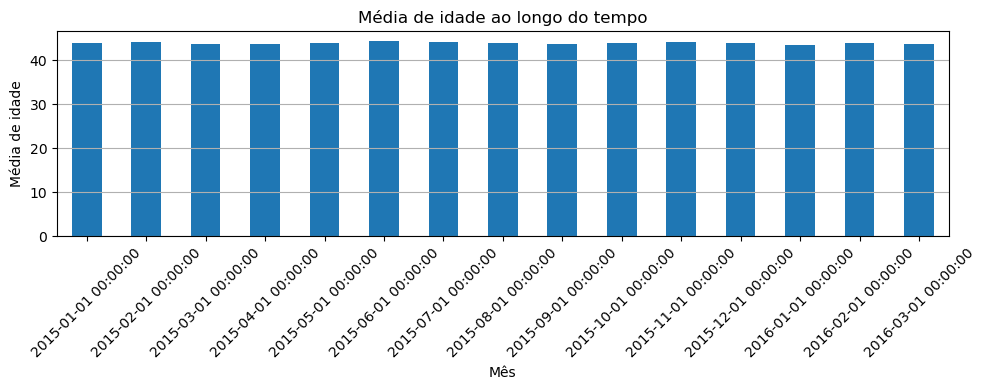

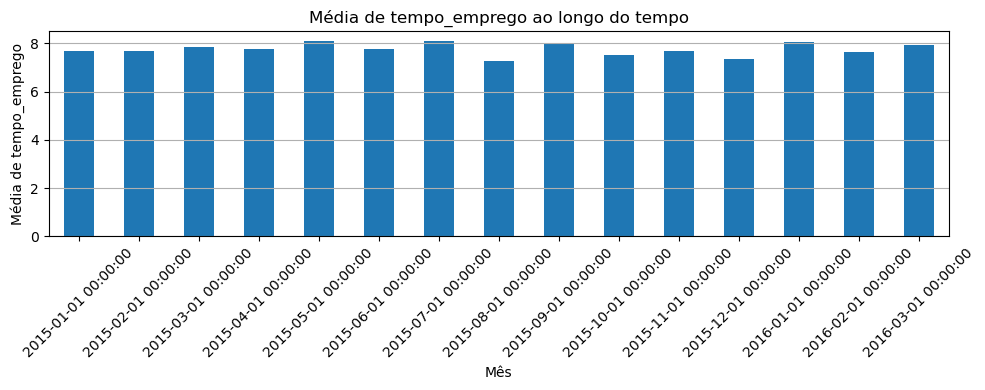

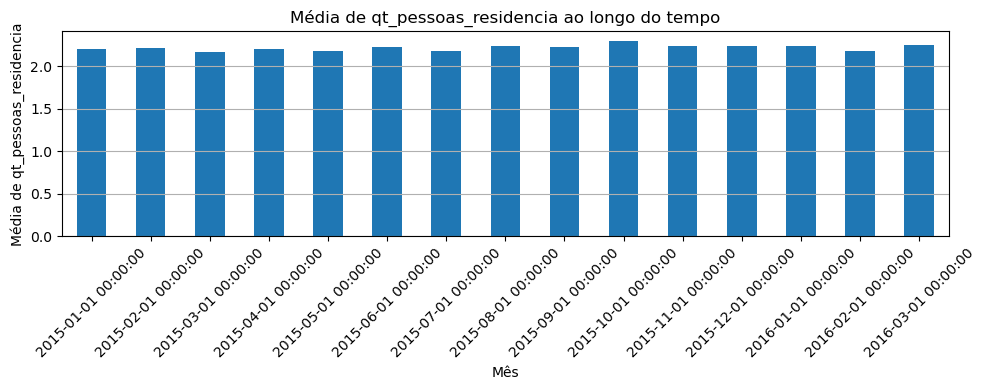

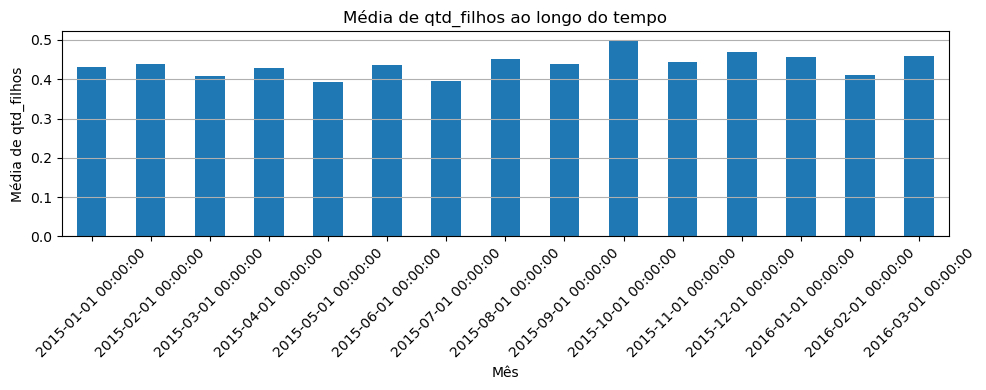

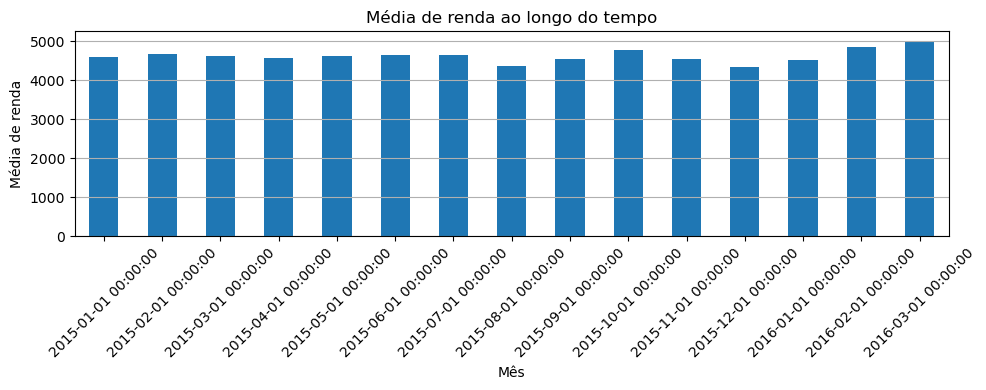

In [14]:
for variavel in variaveis_quantitativas:
    plt.figure(figsize=(10, 4))
    medias_mensais[variavel].plot(kind='bar')
    plt.title(f'Média de {variavel} ao longo do tempo')
    plt.xlabel('Mês')
    plt.ylabel(f'Média de {variavel}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

--> Em todos os casos a média se manteve praticamente constante, com pequenas excessões na quantidade de filhos, que variou entre 0.4 e 0.5. Mas ainda assim, não detectei nenhum padrão tão relevante a ponto de ser investigado.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [16]:
# lista de variáveis qualitativas
variaveis_qualitativas = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
    'educacao', 'estado_civil', 'tipo_residencia', 'mau'
]

<Figure size 1000x500 with 0 Axes>

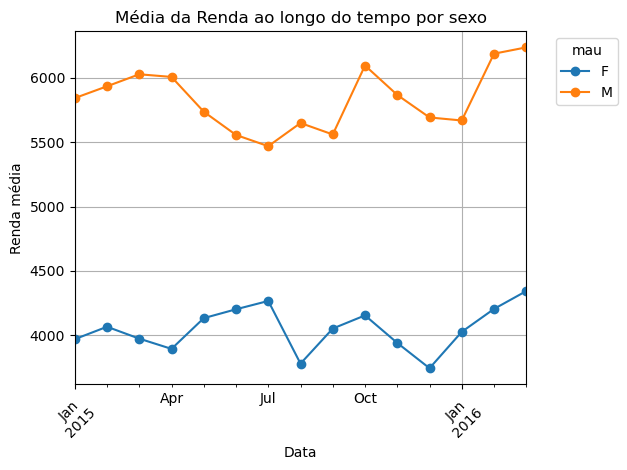

<Figure size 1000x500 with 0 Axes>

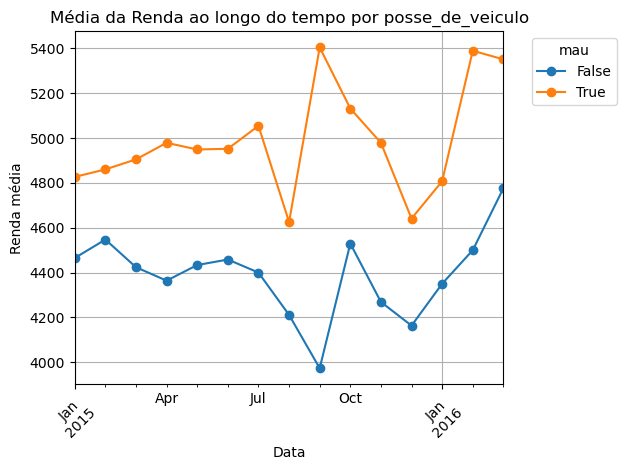

<Figure size 1000x500 with 0 Axes>

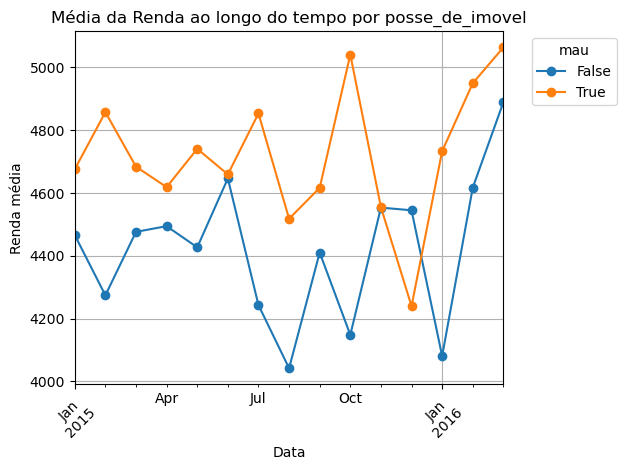

<Figure size 1000x500 with 0 Axes>

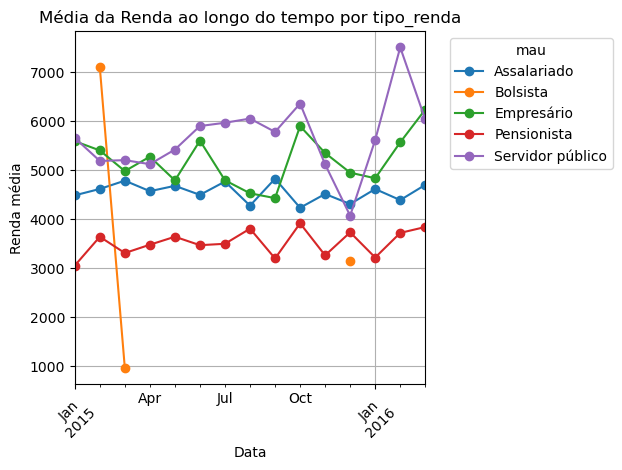

<Figure size 1000x500 with 0 Axes>

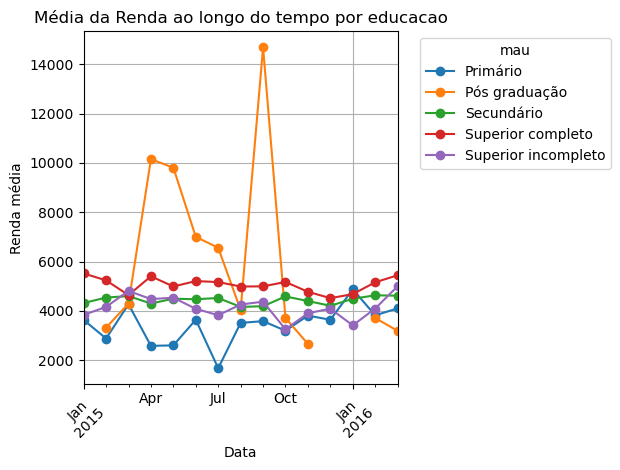

<Figure size 1000x500 with 0 Axes>

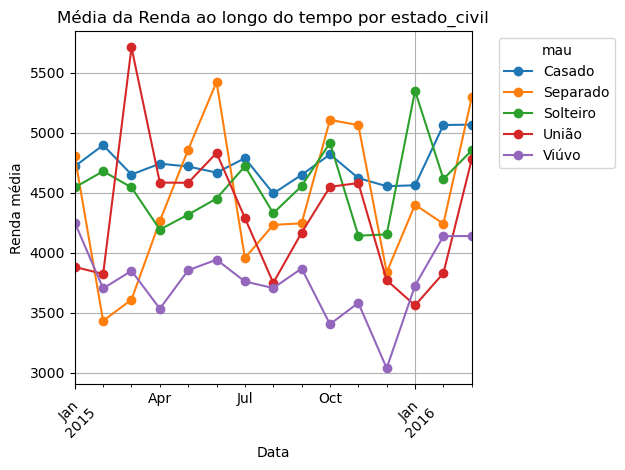

<Figure size 1000x500 with 0 Axes>

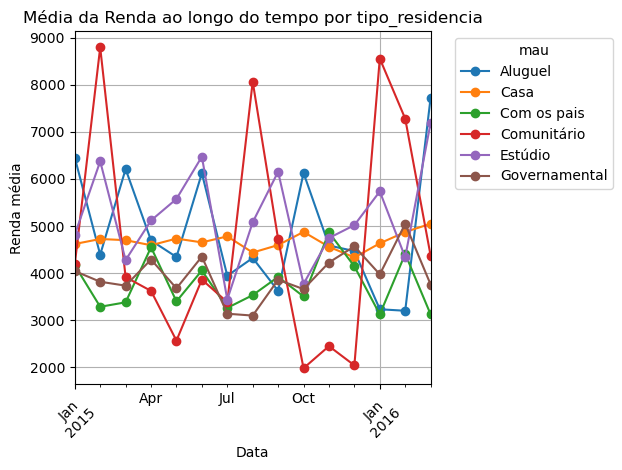

<Figure size 1000x500 with 0 Axes>

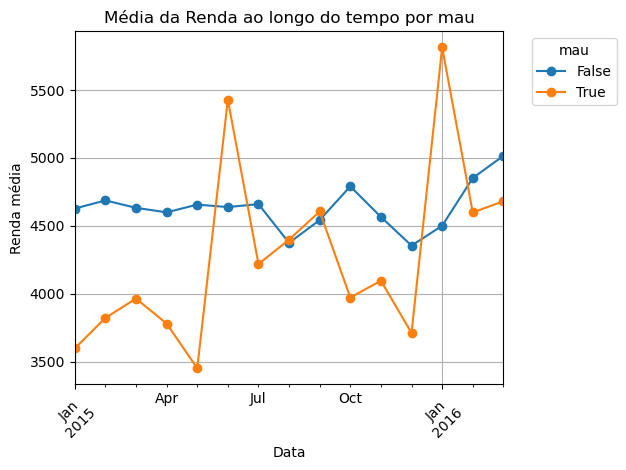

In [31]:
# Para cada variável qualitativa, calcular média da renda ao longo do tempo
for variavel in variaveis_qualitativas:
    medias = df.groupby(['data_ref', variavel])['renda'].mean().unstack()

    plt.figure(figsize=(10, 5))
    medias.plot(marker='o')
    plt.title(f'Média da Renda ao longo do tempo por {variavel}')
    plt.xlabel('Data')
    plt.ylabel('Renda média')
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

--> Houve várias alterações importantes, principalmente no que se diz respeito às variáveis: 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia' e 'mau'.

--> Acredito que sim, essas variáveis podem ser utilizadas na modelagem pois sugerem informações relevantes que se relacionam com a variável 'renda'.

--> Um exemplo: no gráfico renda média x tempo, Servidores Públicos apresentaram uma grande oscilação na virada do ano, podendo ser uma categoria informativa no modelo.